In [1]:
import pandas as pd
car=pd.read_csv('C:/Users/pc/Desktop/datasets/data_german_cars.csv')
car.head(10)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|
9,9,alfa-romeo,Alfa Romeo Spider,black,01/1996,1996,6976,110,150,Manual,Petrol,"9,2 l/100 km",220 g/km,99000.0,2.0 T.Spark L *Klima *2.Hand *Zahnriemen


In [2]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [5]:
car['power_kw']=pd.to_numeric(car['power_kw'], errors='coerce')

In [6]:
car['price_in_euro']=pd.to_numeric(car['price_in_euro'], errors='coerce')

In [7]:
car['power_ps']=pd.to_numeric(car['power_ps'], errors='coerce')

In [8]:
car['transmission_type'].unique()

array(['Manual', 'Unknown', 'Automatic', 'Semi-automatic'], dtype=object)

In [9]:
car['transmission_type']=car['transmission_type'].map({'Manual':'0',
                                                      'Automatic':'1',
                                                      'Semi-automatic':'2',
                                                      'Unknown':'3'})

In [10]:
car['transmission_type']=pd.to_numeric(car['transmission_type'], errors='coerce')

In [13]:
b=car.brand.value_counts()
type(b)

pandas.core.series.Series

In [14]:
import matplotlib.pyplot as plt

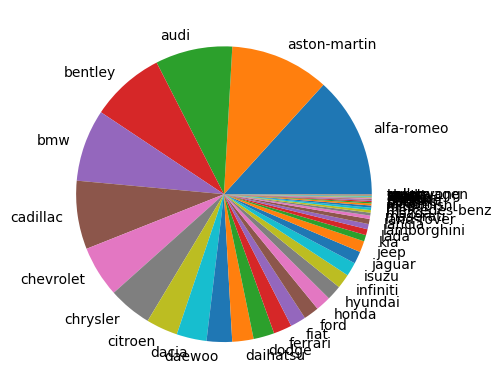

In [15]:
plt.pie(b, labels=car['brand'].unique())
plt.show()

In [16]:
c=car.color.value_counts()
e=car['color'].dropna()
u=e.unique()
u
#len(c)

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange'],
      dtype=object)

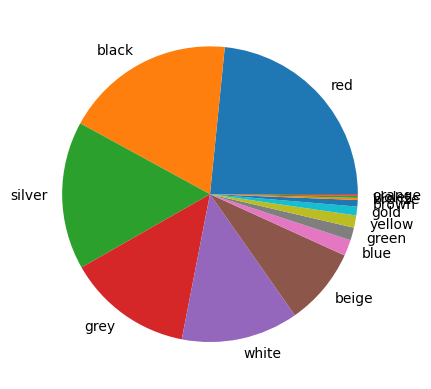

In [17]:
plt.pie(c, labels=u)
plt.show()

In [18]:
car.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                 199
power_kw                      293
power_ps                      210
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [21]:
ca=car.dropna()
ca.isnull().sum()

Unnamed: 0                  0
brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
offer_description           0
dtype: int64

In [24]:
ca=ca.drop('Unnamed: 0', axis=1)
ca.corr()

,price_in_euro,power_kw,power_ps,transmission_type,mileage_in_km
price_in_euro,1.000000,0.606869,0.606940,0.272445,-0.283039
power_kw,0.606869,1.000000,0.999995,0.452895,-0.037672
power_ps,0.606940,0.999995,1.000000,0.452786,-0.037782
transmission_type,0.272445,0.452895,0.452786,1.000000,-0.096801
mileage_in_km,-0.283039,-0.037672,-0.037782,-0.096801,1.000000


In [25]:
ca=ca.select_dtypes(include=['float64','int64'])
ca

,price_in_euro,power_kw,power_ps,transmission_type,mileage_in_km
0,1300.0,148.0,201.0,0,160500.0
3,4900.0,110.0,150.0,0,189500.0
4,17950.0,132.0,179.0,0,96127.0
5,7900.0,110.0,150.0,0,47307.0
6,3500.0,110.0,150.0,0,230000.0
...,...,...,...,...,...
251071,81350.0,228.0,310.0,1,60.0
251072,55400.0,145.0,197.0,1,5000.0
251073,54500.0,145.0,197.0,1,5900.0
251075,89690.0,173.0,235.0,1,4900.0


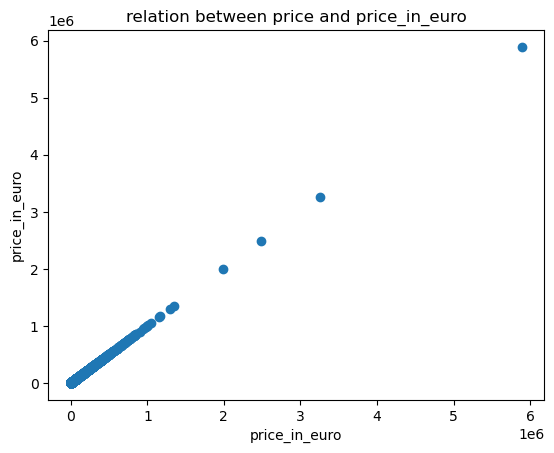

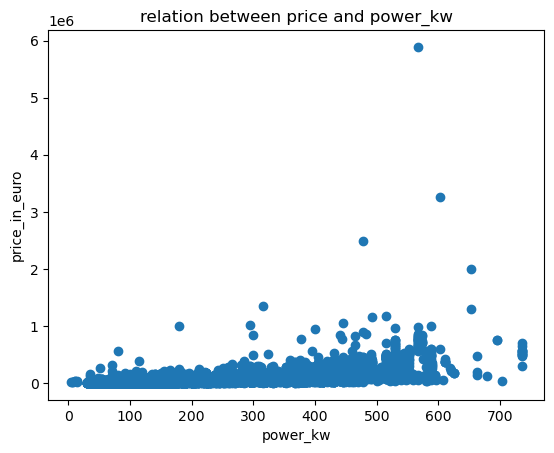

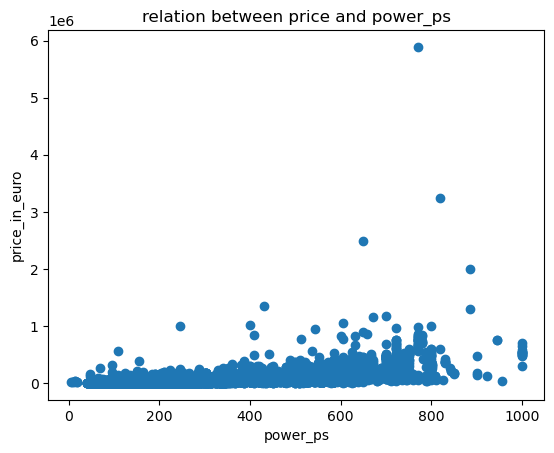

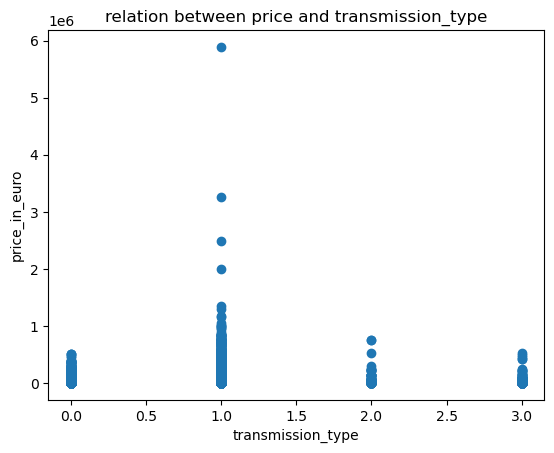

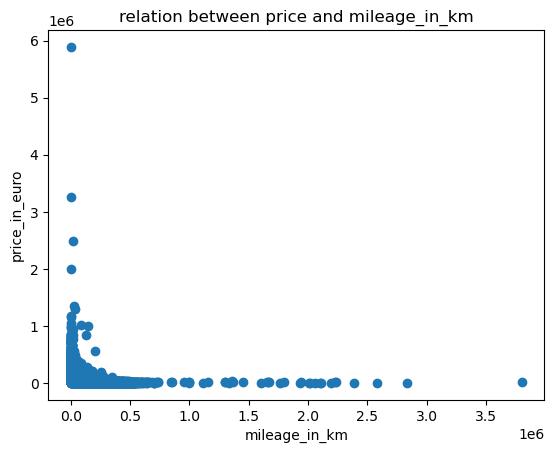

In [41]:
for i in ca.columns.values:
    plt.scatter(x=ca[i], y=ca['price_in_euro'])
    plt.xlabel(i)
    plt.ylabel('price_in_euro')
    plt.title(f'relation between price and {i}')
    plt.show()

In [42]:
from sklearn import preprocessing

In [52]:
Car=preprocessing.normalize(ca)
cars=pd.DataFrame(Car, columns=ca.columns.values)
cars

,price_in_euro,power_kw,power_ps,transmission_type,mileage_in_km
0,0.008099,0.000922,0.001252,0.000000,0.999966
1,0.025849,0.000580,0.000791,0.000000,0.999665
2,0.183559,0.001350,0.001830,0.000000,0.983006
3,0.164712,0.002293,0.003127,0.000000,0.986334
4,0.015216,0.000478,0.000652,0.000000,0.999884
...,...,...,...,...,...
223728,0.999989,0.002803,0.003811,0.000012,0.000738
223729,0.995942,0.002607,0.003542,0.000018,0.089886
223730,0.994181,0.002645,0.003594,0.000018,0.107627
223731,0.998506,0.001926,0.002616,0.000011,0.054551


In [79]:
cars.corr()

,price_in_euro,power_kw,power_ps,transmission_type,mileage_in_km
price_in_euro,1.000000,0.836472,0.836505,0.508672,-0.921570
power_kw,0.836472,1.000000,0.999993,0.494154,-0.693968
power_ps,0.836505,0.999993,1.000000,0.494192,-0.694027
transmission_type,0.508672,0.494154,0.494192,1.000000,-0.429099
mileage_in_km,-0.921570,-0.693968,-0.694027,-0.429099,1.000000


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
y=cars['price_in_euro']
x=cars.drop('price_in_euro', axis=1)

In [82]:
x_train, xtest, y_train, ytest=train_test_split(x, y, test_size=0.2)

In [83]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [84]:
lr.score(xtest, ytest)

0.9154281224895469